In [3]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

##Punto1


In [41]:
n = 10
fname = "data/datos1 .txt"
def cuadratica(n,fname):
  '''
  a es de tipo int
  x1,x2 son de tipo numpy.ndarray
  relative1, relative2,root, c son de tipo numpy.float64
  Esta función busca evaluar las raices de un polinomio cuadratico de dos formas distintas y evaluar su diferencia relativa para encontrar cual es mas precisa.
  la función cuadratica calcula las raices de un polinomio cuyos valores son constantes exceptuando el coeficiente c que varia en potencias negativas de 10 cada vez mas pequeñas.
  finalmente la función escribe los valores encontrados en un archio.txt para un uso posterior en un análisis visual.
  '''
  x1 = x2 = np.zeros(2)
  a = 1
  b =  1
  fout = open(fname, "w")
  for i in range(1,n + 1):
      c = mt.pow(10.0,-i)
      root = mt.sqrt(b -4*c)
      x1[0] = -b + root
      x2[0] = -b - root
      x1[1] = -2*c/(a + root)
      x2[1] = -2*c/(a - root)
      relative1 = abs(x2[0]/x1[0])
      relative2 = abs(x1[1]/x2[1])
      fout.write(f"{c:25.16e}\t{relative1:25.16e}\t{relative2:25.16e}\n")
  fout.close()    
    #error relativo es abs(calculado/teorico)
cuadratica(n,fname)   

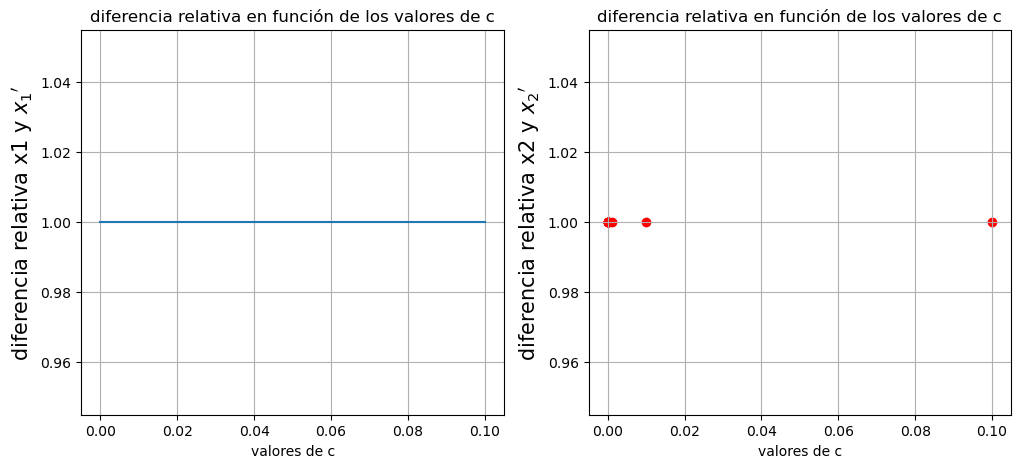

In [42]:
c,x,y = np.loadtxt("data/datos1 .txt", unpack = True)
fig,axes = plt.subplots(1,2,figsize=(12,5))
axes[0].set_yscale("linear")
axes[0].set_xscale("linear")
axes[0].set_xlabel('valores de c')
axes[0].set_ylabel('diferencia relativa x1 y $x_1{\'}$',font={'size':15})
axes[0].set_title('diferencia relativa en función de los valores de c')
axes[0].grid()
axes[0].plot(c,x)
axes[1].set_xscale("linear")
axes[1].set_xlabel('valores de c')
axes[1].set_ylabel('diferencia relativa x2 y $x_2{\'}$',font={'size':15})
axes[1].set_title('diferencia relativa en función de los valores de c')
axes[1].scatter(c,y,color='red');
axes[1].grid()
plt.savefig('diferenciasRelativas')
plt.show()



## Análisis

como la diferencia relativa de las raíces positivas y negativas es prácticamente 1, se encuentra que no hay una diferencia de precisión significativa a tomar en cuenta. Por lo cual, cualquiera de los dos métodos es igual de preciso a priori.
Sin embargo la formula $x_{1,2}$  tiene la ventaja de no tener ninguna indeterminación cuando la raiz negativa es igual a -b. cosa que no ocurre con $x'_{1,2}$,por lo cual $x_{1,2}$ es mejor para un uso generalizado.

## Punto 2

In [23]:

def sinFunction(fname,n):
  '''
  n,i son de tipo int
  c es de tipo float
  f,fmod, x son de tipo numpy.float64
  La funcion sinFunction calcula los valores de la función = 1-sin(x) siendo x un valor que se aproxima por los dos lados a pi/2, incluyendo el valor de pi/2.
  La función usa dos metodos para realizar este proceso f y fmod, f es la función original y fmod es una función que previene el underflow causado por sumar deltas que tienden a 0
  '''
  fout = open(fname, "w")
  count = f= fmod= 0
  c = np.pi/2
  #otra forma de hacerlo es creando un array que almacene los valores del exponente y con list comprehension cambiar los valores a la formula de x según el intervalo. Eliminando el for.
  #no se realizo de esta forma para usar con mas facilidad la escritura del archivo,pero en otra implementación se puede realizar sin necesidad de crear un archivo de texto
  for i in range(1,(2*n+2)):
      if(i <= n):
        x = c - np.power(10.0,-i)
      elif(i > n and i < n+2):
        x = c 
      else:
        val = n-count
        x = c + np.power(10.0,-val)
        count+=1
      f = 1-np.sin(x)
      fmod = (np.power(np.cos(x),2))/(1 + np.sin(x)) #utilizando el complemento y la propiedad trigonometrica del sin²x +cos²x=1
      fout.write(f"{x} \t{f:25.16e}\t{fmod:25.16e}\n")
  fout.close()
fname = "data/datos2.txt"
sinFunction(fname,10)

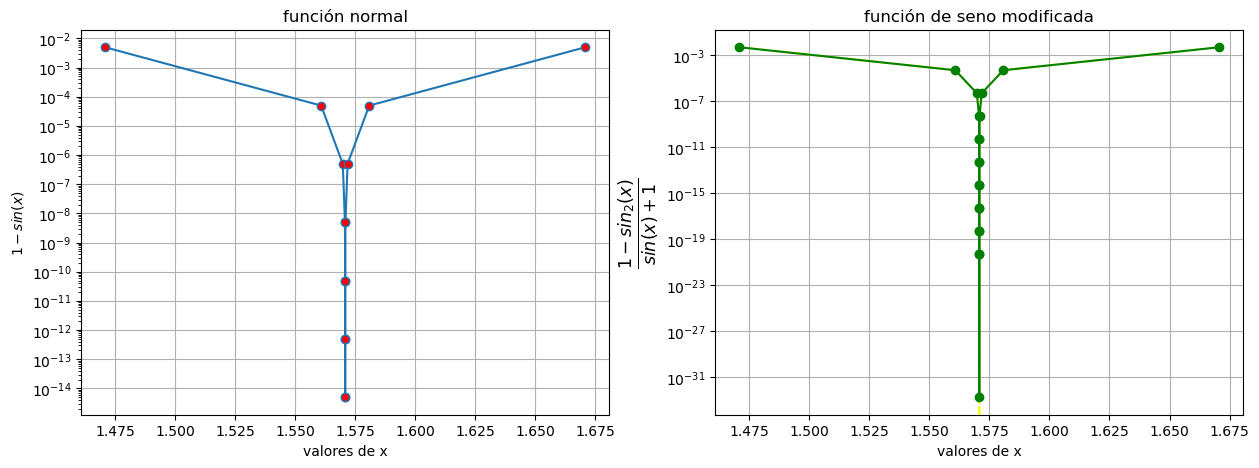

In [28]:
x,f,fmod = np.loadtxt("data/datos2.txt", unpack = True)
fig,axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_xlabel('valores de x')
axes[0].set_ylabel('$1-sin(x)$',font={'size':10})
axes[0].set_yscale('logit')
axes[0].set_title('función normal')
axes[0].grid()
axes[0].plot(x,f,marker='o',markerfacecolor='red')
axes[1].set_xlabel('valores de x')
axes[1].set_ylabel('$\\frac{1-sin_2(x)}{sin(x)+1}$',font={'size':18})
axes[1].set_yscale('log')
axes[1].set_title('función de seno modificada')
axes[1].plot(x,f,linestyle='dashed',color='yellow')
axes[1].plot(x,fmod,color='green',marker='o',markerfacecolor='green')
axes[1].grid()
plt.savefig('sinovssinomodificado')
plt.show()

##Análisis

El método modificado maneja mejor el underflow ya que elimina la resta del método original.
Podemos ver que al superponer el método original en la segunda gráfica, vemos cómo la gráfica de color verde no hace underflow, a diferencia de la gráfica de color amarillo segmentada(la cual es la primera gráfica).
Podemos concluir que aunque son algebraicamente la misma expresión, su desempeño computacional puede variar drásticamente dependiendo de la forma en que se expresa la función.
